In [1]:
import torch
import torch.nn as nn
from torch.optim import SGD
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision
import numpy as np
import torchvision.transforms as transforms 
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
class CTDataset(Dataset):
    def __init__(self, filepath):
        self.x, self.y = torch.load(filepath)
        self.x = self.x / 255. 
        # Normalises the input data to scale pixel values from 0 to 1 
        # A pixel value typically ranges from 0 (black) to 255 (white) for 8-bit images 
        
        self.y = F.one_hot(self.y, num_classes=10).to(float)
    def __len__(self): 
        return self.x.shape[0]
    def __getitem__(self, ix): 
        return self.x[ix], self.y[ix]

Neural network model using the nn.Module base class 
Designed for a classificiation task with 10 classes 
Composed of three fully connected linear layers separated by ReLY activation functions 

In [3]:
class MyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        # These layers will perform linear transformations on the input data 
        self.Matrix1 = nn.Linear(28**2,100)
        # First layer input size - 784 pixels 
        self.Matrix2 = nn.Linear(100,50)
        # Second layer: 100 units 
        self.Matrix3 = nn.Linear(50,10)
        # Third layer: 50 units 
        self.R = nn.ReLU()
    def forward(self,x):
        x = x.view(-1,28**2)
        # The ReLU activation (backprop) is applied after each linear layer 
        # to introduce non-linearity to the model 
        x = self.R(self.Matrix1(x))
        x = self.R(self.Matrix2(x))
        x = self.Matrix3(x)
        #return x.squeeze()
        return x
        # The squeeze method removes any dimensions of size 1 

Trains a neural network model using stochastic gradient descent SGD for a specified number of epochs on a given dataset dl while recording the training losses and the progress of each epoch 

Epoch - one complete pass through the entire training data set 

In [4]:
def train_model(dl, f, n_epochs=20):
    # Optimization
    opt = SGD(f.parameters(), lr=0.01)
    # Initialised the SGD optimiser 
    # Learning rate of 0.01 - the optimiser should make relatively large 
    # adjustments to the models parameters pased on the computer gradients 
    L = nn.CrossEntropyLoss()

    # Train model
    losses = []
    epochs = []
    for epoch in range(n_epochs):
        print(f'Epoch {epoch}')
        N = len(dl)
        for i, (x, y) in enumerate(dl):
            
            opt.zero_grad() 
            # Initialises the gradients to 0 
            loss_value = L(f(x), y) 
            # Calculates loss by using Cross-Entropy Loss function 
            loss_value.backward() 
            # Computes the gradients of the loss wrt to the model's parameters (weights)
            opt.step() 
            # Update the weights of the network
            
            # Store training data
            epochs.append(epoch+i/N)
            losses.append(loss_value.item())
    return np.array(epochs), np.array(losses)

Trains the model - takes in the MNIST training data set 

In [6]:
def mnist(train_ds):

    train_dl = DataLoader(train_ds, batch_size=5)
     # Batch size = 5, the length of train_dl = 12000
    # Useful for breaking up the data into batches 

    L = nn.CrossEntropyLoss()
    neuralModel = MyNeuralNet() 

    # print(L(neuralModel(xs), ys))
    # The loss function needs to be as small as possible 
    # The weights in neuralModel needs to be adjust so that L is asap
    
    
    # train_model(train_dl, neuralModel)
    epoch_data, loss_data = train_model(train_dl, neuralModel)
    # Shows the loss as a graph 
    epoch_data_avgd = epoch_data.reshape(20,-1).mean(axis=1)
    loss_data_avgd = loss_data.reshape(20,-1).mean(axis=1)

    plt.plot(epoch_data_avgd, loss_data_avgd, 'o--')
    plt.xlabel('Epoch Number')
    plt.ylabel('Cross Entropy')
    plt.title('Cross Entropy (avgd per epoch)')
    plt.show()
    return neuralModel

Transforms a tensor to an image 

In [10]:
def tensorToImage(tensor):
    transform = transforms.ToPILImage()
    img = transform(tensor)
    return img

Transforms an image to a tensor

In [12]:
def imageToTensor(imageName):   
    # Read a PIL image 
    image = Image.open('imageName') 
    # Define a transform to convert PIL image to a Torch tensor 
    transform = transforms.Compose([ transforms.PILToTensor() ]) 
    # transform = transforms.PILToTensor() 
    # Convert the PIL image to Torch tensor 
    img_tensor = transform(image) 
    return img_tensor; 

In [13]:
def main():
    
    # Tests the first function 
    train_dataset = CTDataset('/Users/zhangc/Documents/Formula Trinity/MNIST/processed/training.pt')
    test_dataset = CTDataset('/Users/zhangc/Documents/Formula Trinity/MNIST/processed/test.pt')
    testImage, testLabel = test_dataset[1]
    
    tensorImage = tensorToImage(testImage)
    tensorImage.show()
    # Predicted label 
    # returns the predicted integer for the image 
    neuralModel = mnist(train_dataset)
    yhats = neuralModel(testImage).argmax(axis=1)
    print(yhats.item())
    
    # contains all the predictions for the 2000 images in test_ds 
    #The argmax(axis=1) is applied to find the class with the highest probability for each image 

    # testImages, testLabels = test_dataset[:2000]
    # yhats = neuralModel(testImages).argmax(axis=1)
    
    # # Plotting 40 images 
    # fig, ax = plt.subplots(10,4,figsize=(10,15))
    # for i in range(40):
    #     plt.subplot(10,4,i+1)
    #     plt.imshow(testImages[i])
    #     plt.title(f'Predicted Digit: {yhats[i]}')
    # fig.tight_layout()
    # plt.show()
    

Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19


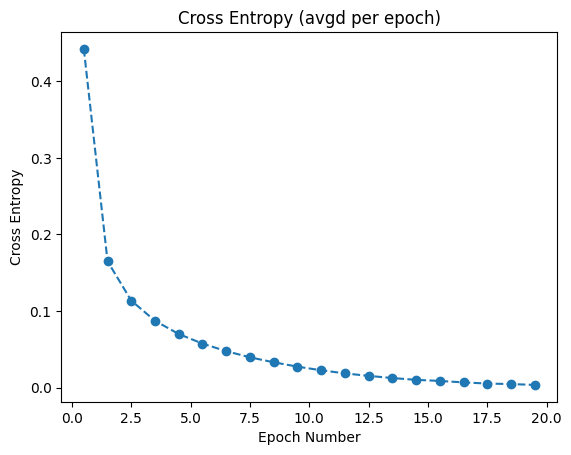

2


In [14]:

if __name__ == "__main__":
    main()